### Análisis Discriminante 

#### Cargamos el Dataset Wines

In [3]:
# Cargamos los datos Wine
from sklearn import datasets

wines = datasets.load_wine()
print(wines.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Almacenamos la data en un df de pandas

In [4]:
import pandas as pd
df = pd.DataFrame(wines.data, columns = wines.feature_names)
df['Class'] = wines.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Reordenamos los campos del df

In [6]:
# Para ordenar el DF
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
### Organizamos las columnas.
df = df[cols]
df.head()

,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Se calculan los descriptivos

In [7]:
df.describe()

,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,0.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,2.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,2.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Graficamos

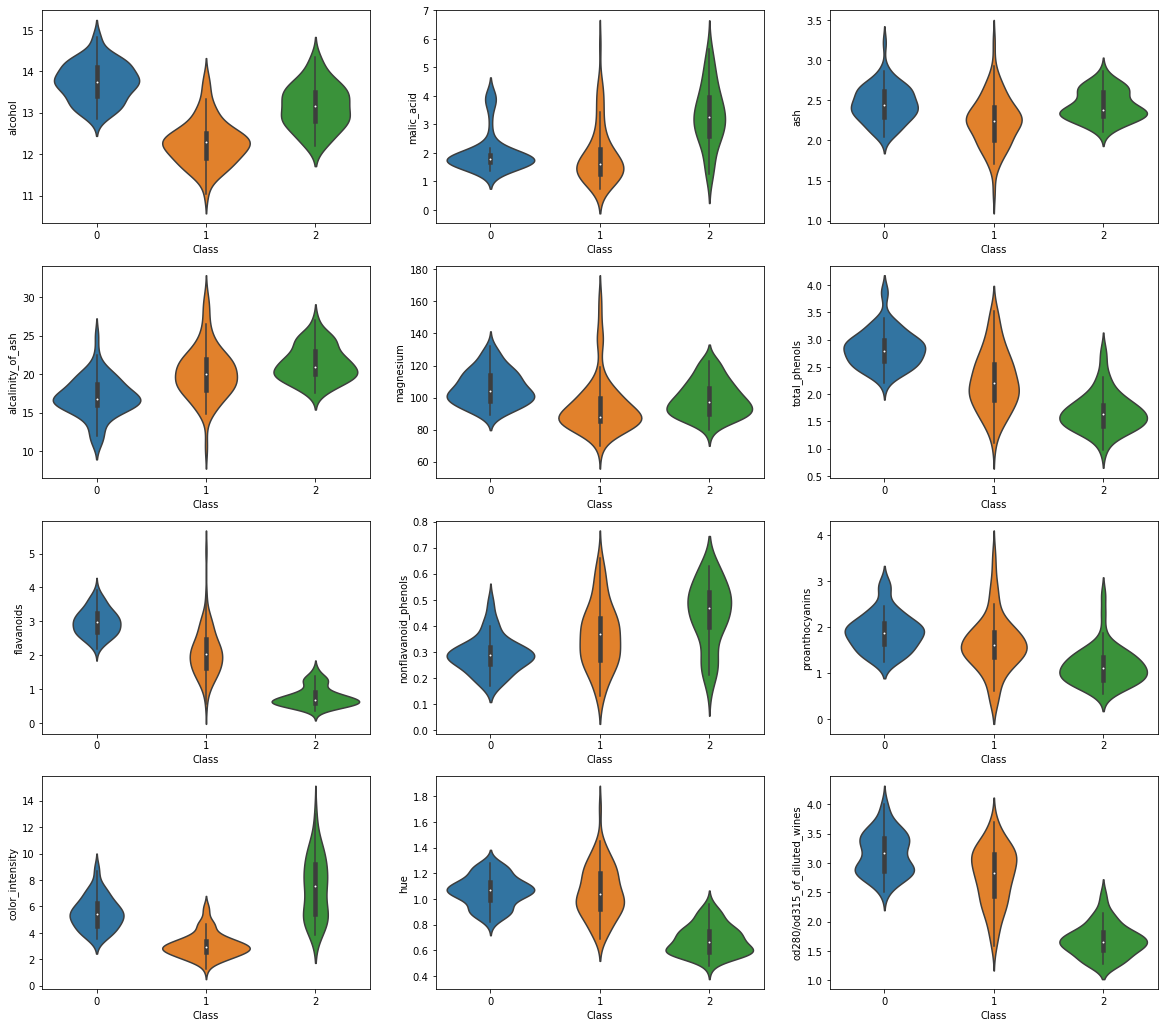

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(4, 3, figsize=(20,18))
vis1 = sns.violinplot(x="Class", y="alcohol", data=df, ax= ax[0,0])
vis2 = sns.violinplot(x="Class", y="malic_acid", data=df, ax= ax[0,1])
vis3 = sns.violinplot(x="Class", y="ash", data=df, ax= ax[0,2])
vis4 = sns.violinplot(x="Class", y="alcalinity_of_ash", data=df, ax= ax[1,0])
vis5 = sns.violinplot(x="Class", y="magnesium", data=df, ax= ax[1,1])
vis6 = sns.violinplot(x="Class", y="total_phenols", data=df, ax= ax[1,2])
vis7 = sns.violinplot(x="Class", y="flavanoids", data=df, ax= ax[2,0])
vis8 = sns.violinplot(x="Class", y="nonflavanoid_phenols", data=df, ax= ax[2,1])
vis9 = sns.violinplot(x="Class", y="proanthocyanins", data=df, ax= ax[2,2])
vis10 = sns.violinplot(x="Class", y="color_intensity", data=df, ax= ax[3,0])
vis11 = sns.violinplot(x="Class", y="hue", data=df, ax= ax[3,1])
vis12 = sns.violinplot(x="Class", y="od280/od315_of_diluted_wines", data=df, ax= ax[3,2])

Pre procesamos para entrenar el modelo

In [10]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Class'], axis=1)  
y = df['Class']

In [11]:
X[['alcohol']] = StandardScaler().fit_transform(X[['alcohol']])
X[['malic_acid']] = StandardScaler().fit_transform(X[['malic_acid']])
X[['ash']] = StandardScaler().fit_transform(X[['ash']])
X[['alcalinity_of_ash']] = StandardScaler().fit_transform(X[['alcalinity_of_ash']])
X[['magnesium']] = StandardScaler().fit_transform(X[['magnesium']])
X[['total_phenols']] = StandardScaler().fit_transform(X[['total_phenols']])
X[['flavanoids']] = StandardScaler().fit_transform(X[['flavanoids']])
X[['nonflavanoid_phenols']] = StandardScaler().fit_transform(X[['nonflavanoid_phenols']])
X[['proanthocyanins']] = StandardScaler().fit_transform(X[['proanthocyanins']])
X[['color_intensity']] = StandardScaler().fit_transform(X[['color_intensity']])
X[['hue']] = StandardScaler().fit_transform(X[['hue']])
X[['od280/od315_of_diluted_wines']] = StandardScaler().fit_transform(X[['od280/od315_of_diluted_wines']])
X[['proline']] = StandardScaler().fit_transform(X[['proline']])
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


Hacemos el split del df

In [12]:
train_X,test_X,train_y,test_y = train_test_split(X,y, test_size=0.33, random_state  = 0)
print(train_X.shape, test_X.shape)

(119, 13) (59, 13)


In [13]:
model  = LinearDiscriminantAnalysis()
model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [14]:
model.fit(train_X, train_y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [16]:
y_test_pred_0 = model.predict(test_X)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test_y, y_test_pred_0))
print(classification_report(test_y, y_test_pred_0))

[[20  0  0]
 [ 1 23  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, y_test_pred_0)

0.9830508474576272